In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

In [4]:
data = pd.read_csv("history_weather_daily_data.csv", index_col = "date")

In [5]:
data.head()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
date,,,,,,,,,,,,,,,,,,,,
2000-01-01 18:30:00+00:00,61.0,26.543499,22.793499,24.110168,28.597702,24.791435,26.402510,0,0,42221.723,24751.064,8.900001,8.900001,0.0,11.0,19.134262,37.80,10.383627,10.61,2.506847
2000-01-02 18:30:00+00:00,63.0,27.693500,22.543499,24.074753,32.474655,25.464775,27.632017,0,0,42227.633,24266.627,28.099998,28.099998,0.0,21.0,13.138765,24.84,9.580820,10.33,2.128832
2000-01-03 18:30:00+00:00,63.0,28.543499,22.543499,24.628916,33.333260,25.571670,28.052970,0,0,42234.062,21334.076,7.100000,7.100000,0.0,8.0,12.864649,28.08,13.739626,13.22,2.766603
2000-01-04 18:30:00+00:00,61.0,29.393500,23.093500,25.335165,35.204453,26.098940,29.552160,0,0,42241.000,29553.287,4.100000,4.100000,0.0,5.0,12.758432,26.28,25.598091,16.06,3.225424
2000-01-05 18:30:00+00:00,63.0,28.143500,22.843500,25.001833,33.507010,27.045303,29.676046,0,0,42248.430,16886.305,6.800000,6.800000,0.0,9.0,8.766573,17.28,33.963240,10.88,2.271391


In [6]:
data.shape

(9163, 20)

In [7]:
data.weather_code.value_counts()

weather_code
63.0    2399
51.0    1986
61.0    1562
53.0    1404
3.0      756
55.0     532
65.0     268
2.0      150
1.0       90
0.0       16
Name: count, dtype: int64

In [8]:
data.isnull().sum()

weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

In [9]:
data.describe()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.0,9163.0,9163.000000,9163.000000,9163.000000,9163.000000,9163.0,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000
mean,51.452035,29.496654,24.263908,26.526603,34.918047,28.558919,31.150017,0.0,0.0,43639.402106,33461.777138,7.774255,7.774255,0.0,11.030339,15.176072,34.316490,200.407399,17.929986,3.690779
std,17.898272,1.484124,1.153107,0.918931,2.111199,1.862366,1.423324,0.0,0.0,1003.093219,8914.104392,10.629451,10.629451,0.0,7.221127,4.511502,8.731783,93.050024,4.044691,0.879777
min,0.000000,21.993500,16.893500,21.437250,23.178328,18.025314,21.860510,0.0,0.0,42190.850000,0.000000,0.000000,0.000000,0.0,0.000000,4.510787,12.240000,0.000005,1.760000,0.657844
25%,51.000000,28.543499,23.606500,25.889332,33.479431,27.725824,30.395513,0.0,0.0,42656.082000,30270.698000,1.200000,1.200000,0.0,5.000000,11.753877,27.540000,173.452885,15.520000,3.120717
50%,55.000000,29.256500,24.356500,26.485163,34.857685,28.832375,31.198740,0.0,0.0,43639.070000,37144.790000,4.200000,4.200000,0.0,11.000000,15.034041,33.480000,229.707810,18.460000,3.728996
75%,63.000000,30.293499,25.043499,27.087250,36.412319,29.793045,32.010760,0.0,0.0,44621.252500,39600.000000,10.500001,10.500001,0.0,17.000000,18.335276,40.320000,257.011075,20.930000,4.298670
max,65.000000,35.793500,27.606500,30.097666,41.129913,33.763348,35.790670,0.0,0.0,45088.816000,41956.266000,195.900010,195.900010,0.0,24.000000,38.592266,77.760000,359.999970,26.700000,6.730892


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9163 entries, 2000-01-01 18:30:00+00:00 to 2025-01-31 18:30:00+00:00
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   weather_code                 9163 non-null   float64
 1   temperature_2m_max           9163 non-null   float64
 2   temperature_2m_min           9163 non-null   float64
 3   temperature_2m_mean          9163 non-null   float64
 4   apparent_temperature_max     9163 non-null   float64
 5   apparent_temperature_min     9163 non-null   float64
 6   apparent_temperature_mean    9163 non-null   float64
 7   sunrise                      9163 non-null   int64  
 8   sunset                       9163 non-null   int64  
 9   daylight_duration            9163 non-null   float64
 10  sunshine_duration            9163 non-null   float64
 11  precipitation_sum            9163 non-null   float64
 12  rain_sum                     9163 no

In [11]:
data.index = pd.to_datetime(data.index)

In [12]:
data.index

DatetimeIndex(['2000-01-01 18:30:00+00:00', '2000-01-02 18:30:00+00:00',
               '2000-01-03 18:30:00+00:00', '2000-01-04 18:30:00+00:00',
               '2000-01-05 18:30:00+00:00', '2000-01-06 18:30:00+00:00',
               '2000-01-07 18:30:00+00:00', '2000-01-08 18:30:00+00:00',
               '2000-01-09 18:30:00+00:00', '2000-01-10 18:30:00+00:00',
               ...
               '2025-01-22 18:30:00+00:00', '2025-01-23 18:30:00+00:00',
               '2025-01-24 18:30:00+00:00', '2025-01-25 18:30:00+00:00',
               '2025-01-26 18:30:00+00:00', '2025-01-27 18:30:00+00:00',
               '2025-01-28 18:30:00+00:00', '2025-01-29 18:30:00+00:00',
               '2025-01-30 18:30:00+00:00', '2025-01-31 18:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=9163, freq=None)

In [13]:
data.index.year.value_counts().sort_index()

date
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025     31
Name: count, dtype: int64

In [14]:
data.head()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
date,,,,,,,,,,,,,,,,,,,,
2000-01-01 18:30:00+00:00,61.0,26.543499,22.793499,24.110168,28.597702,24.791435,26.402510,0,0,42221.723,24751.064,8.900001,8.900001,0.0,11.0,19.134262,37.80,10.383627,10.61,2.506847
2000-01-02 18:30:00+00:00,63.0,27.693500,22.543499,24.074753,32.474655,25.464775,27.632017,0,0,42227.633,24266.627,28.099998,28.099998,0.0,21.0,13.138765,24.84,9.580820,10.33,2.128832
2000-01-03 18:30:00+00:00,63.0,28.543499,22.543499,24.628916,33.333260,25.571670,28.052970,0,0,42234.062,21334.076,7.100000,7.100000,0.0,8.0,12.864649,28.08,13.739626,13.22,2.766603
2000-01-04 18:30:00+00:00,61.0,29.393500,23.093500,25.335165,35.204453,26.098940,29.552160,0,0,42241.000,29553.287,4.100000,4.100000,0.0,5.0,12.758432,26.28,25.598091,16.06,3.225424
2000-01-05 18:30:00+00:00,63.0,28.143500,22.843500,25.001833,33.507010,27.045303,29.676046,0,0,42248.430,16886.305,6.800000,6.800000,0.0,9.0,8.766573,17.28,33.963240,10.88,2.271391


### Create Target Variable

In [15]:
data["target"] = data.shift(-1)["rain_sum"]

In [16]:
data.head()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,...,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,target
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01 18:30:00+00:00,61.0,26.543499,22.793499,24.110168,28.597702,24.791435,26.402510,0,0,42221.723,...,8.900001,8.900001,0.0,11.0,19.134262,37.80,10.383627,10.61,2.506847,28.099998
2000-01-02 18:30:00+00:00,63.0,27.693500,22.543499,24.074753,32.474655,25.464775,27.632017,0,0,42227.633,...,28.099998,28.099998,0.0,21.0,13.138765,24.84,9.580820,10.33,2.128832,7.100000
2000-01-03 18:30:00+00:00,63.0,28.543499,22.543499,24.628916,33.333260,25.571670,28.052970,0,0,42234.062,...,7.100000,7.100000,0.0,8.0,12.864649,28.08,13.739626,13.22,2.766603,4.100000
2000-01-04 18:30:00+00:00,61.0,29.393500,23.093500,25.335165,35.204453,26.098940,29.552160,0,0,42241.000,...,4.100000,4.100000,0.0,5.0,12.758432,26.28,25.598091,16.06,3.225424,6.800000
2000-01-05 18:30:00+00:00,63.0,28.143500,22.843500,25.001833,33.507010,27.045303,29.676046,0,0,42248.430,...,6.800000,6.800000,0.0,9.0,8.766573,17.28,33.963240,10.88,2.271391,25.600000


In [17]:
data = data.ffill()

In [18]:
data.tail()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,...,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,target
date,,,,,,,,,,,,,,,,,,,,,
2025-01-27 18:30:00+00:00,53.0,27.956501,21.5065,24.546082,32.954002,23.945688,28.456533,0,0,42530.703,...,1.400000,1.400000,0.0,3.0,8.951267,23.039999,30.096085,12.51,2.592842,18.800001
2025-01-28 18:30:00+00:00,65.0,30.256500,22.5565,25.556498,36.642590,25.569847,29.474602,0,0,42547.105,...,18.800001,18.800001,0.0,13.0,15.661035,36.360000,23.338226,16.80,3.491752,8.899999
2025-01-29 18:30:00+00:00,63.0,28.956501,23.3565,25.591919,35.694880,27.415434,30.619116,0,0,42563.902,...,8.899999,8.899999,0.0,11.0,14.420235,30.960001,333.435000,16.15,3.190349,4.500000
2025-01-30 18:30:00+00:00,63.0,29.906500,23.6065,25.987747,36.698494,28.591663,31.545450,0,0,42581.066,...,4.500000,4.500000,0.0,6.0,8.139901,29.880000,313.830930,18.77,3.718038,1.500000
2025-01-31 18:30:00+00:00,53.0,29.706501,23.5565,25.879412,36.193707,28.199284,31.275892,0,0,42598.582,...,1.500000,1.500000,0.0,4.0,10.934166,32.039997,236.309700,21.17,4.096775,1.500000


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
weather_code,9163.0,51.452035,17.898272,0.000000,51.000000,55.000000,63.000000,65.000000
temperature_2m_max,9163.0,29.496654,1.484124,21.993500,28.543499,29.256500,30.293499,35.793500
temperature_2m_min,9163.0,24.263908,1.153107,16.893500,23.606500,24.356500,25.043499,27.606500
temperature_2m_mean,9163.0,26.526603,0.918931,21.437250,25.889332,26.485163,27.087250,30.097666
apparent_temperature_max,9163.0,34.918047,2.111199,23.178328,33.479431,34.857685,36.412319,41.129913
apparent_temperature_min,9163.0,28.558919,1.862366,18.025314,27.725824,28.832375,29.793045,33.763348
apparent_temperature_mean,9163.0,31.150017,1.423324,21.860510,30.395513,31.198740,32.010760,35.790670
sunrise,9163.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sunset,9163.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
daylight_duration,9163.0,43639.402106,1003.093219,42190.850000,42656.082000,43639.070000,44621.252500,45088.816000


In [20]:
data.precipitation_sum.value_counts()

precipitation_sum
0.000000      1012
0.100000       161
0.200000       119
0.400000       118
0.300000       106
              ... 
140.899980       1
77.700010        1
15.199998        1
32.999996        1
40.099995        1
Name: count, Length: 1293, dtype: int64

In [21]:
def rain_category(target):
    if target <= 0:
        return "no-rain"
    elif 0 < target <= 10:
        return "drizzeling"
    else:
        return "rain"
data["rain_category"] = data["target"].apply(rain_category)

In [22]:
data.tail()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,...,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,target,rain_category
date,,,,,,,,,,,,,,,,,,,,,
2025-01-27 18:30:00+00:00,53.0,27.956501,21.5065,24.546082,32.954002,23.945688,28.456533,0,0,42530.703,...,1.400000,0.0,3.0,8.951267,23.039999,30.096085,12.51,2.592842,18.800001,rain
2025-01-28 18:30:00+00:00,65.0,30.256500,22.5565,25.556498,36.642590,25.569847,29.474602,0,0,42547.105,...,18.800001,0.0,13.0,15.661035,36.360000,23.338226,16.80,3.491752,8.899999,drizzeling
2025-01-29 18:30:00+00:00,63.0,28.956501,23.3565,25.591919,35.694880,27.415434,30.619116,0,0,42563.902,...,8.899999,0.0,11.0,14.420235,30.960001,333.435000,16.15,3.190349,4.500000,drizzeling
2025-01-30 18:30:00+00:00,63.0,29.906500,23.6065,25.987747,36.698494,28.591663,31.545450,0,0,42581.066,...,4.500000,0.0,6.0,8.139901,29.880000,313.830930,18.77,3.718038,1.500000,drizzeling
2025-01-31 18:30:00+00:00,53.0,29.706501,23.5565,25.879412,36.193707,28.199284,31.275892,0,0,42598.582,...,1.500000,0.0,4.0,10.934166,32.039997,236.309700,21.17,4.096775,1.500000,drizzeling


In [23]:
data.rain_category.value_counts()

rain_category
drizzeling    5731
rain          2420
no-rain       1012
Name: count, dtype: int64

### Data Preparation

In [24]:
data = data.drop(columns = ['weather_code','temperature_2m_mean','apparent_temperature_mean','sunrise','sunset','precipitation_sum','snowfall_sum','precipitation_hours','target'])

In [25]:
data.head()

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,rain_category
date,,,,,,,,,,,,,
2000-01-01 18:30:00+00:00,26.543499,22.793499,28.597702,24.791435,42221.723,24751.064,8.900001,19.134262,37.80,10.383627,10.61,2.506847,rain
2000-01-02 18:30:00+00:00,27.693500,22.543499,32.474655,25.464775,42227.633,24266.627,28.099998,13.138765,24.84,9.580820,10.33,2.128832,drizzeling
2000-01-03 18:30:00+00:00,28.543499,22.543499,33.333260,25.571670,42234.062,21334.076,7.100000,12.864649,28.08,13.739626,13.22,2.766603,drizzeling
2000-01-04 18:30:00+00:00,29.393500,23.093500,35.204453,26.098940,42241.000,29553.287,4.100000,12.758432,26.28,25.598091,16.06,3.225424,drizzeling
2000-01-05 18:30:00+00:00,28.143500,22.843500,33.507010,27.045303,42248.430,16886.305,6.800000,8.766573,17.28,33.963240,10.88,2.271391,rain


### EDA

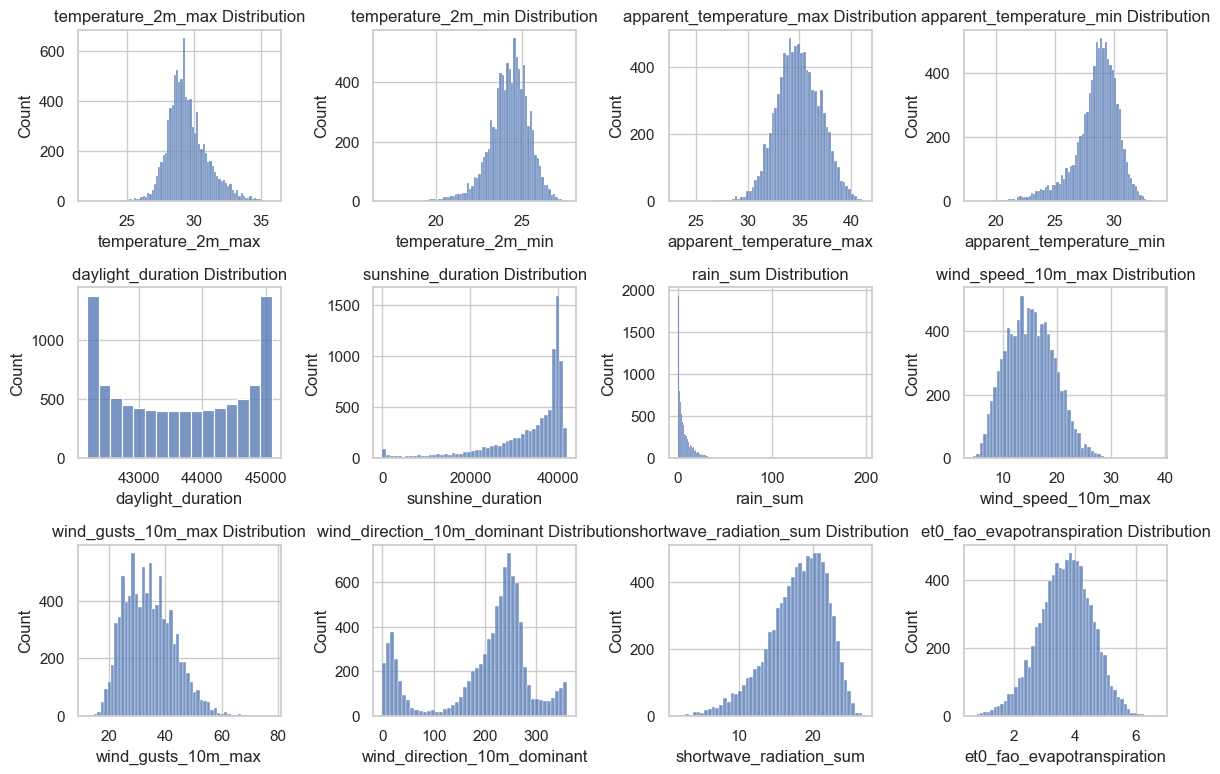

In [24]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(12, 10))
cols = ['temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','daylight_duration','sunshine_duration','rain_sum','wind_speed_10m_max','wind_gusts_10m_max','wind_direction_10m_dominant','shortwave_radiation_sum','et0_fao_evapotranspiration']

for idx, i in enumerate(cols):
    plt.subplot(4, 4, idx+1)
    sns.histplot(x=i, data=data)
    plt.title(f"{i} Distribution")
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='rain_category'>

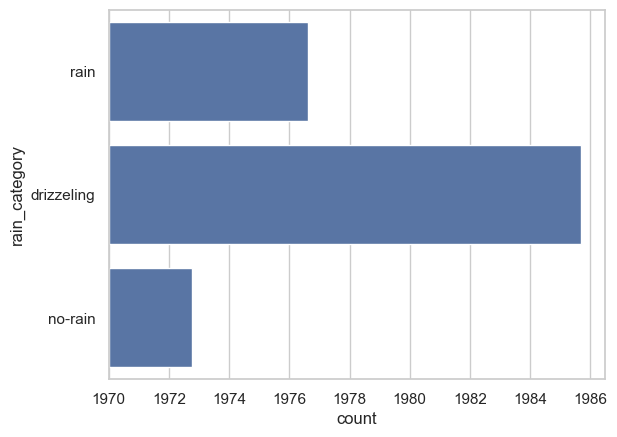

In [25]:
sns.countplot(data['rain_category'])

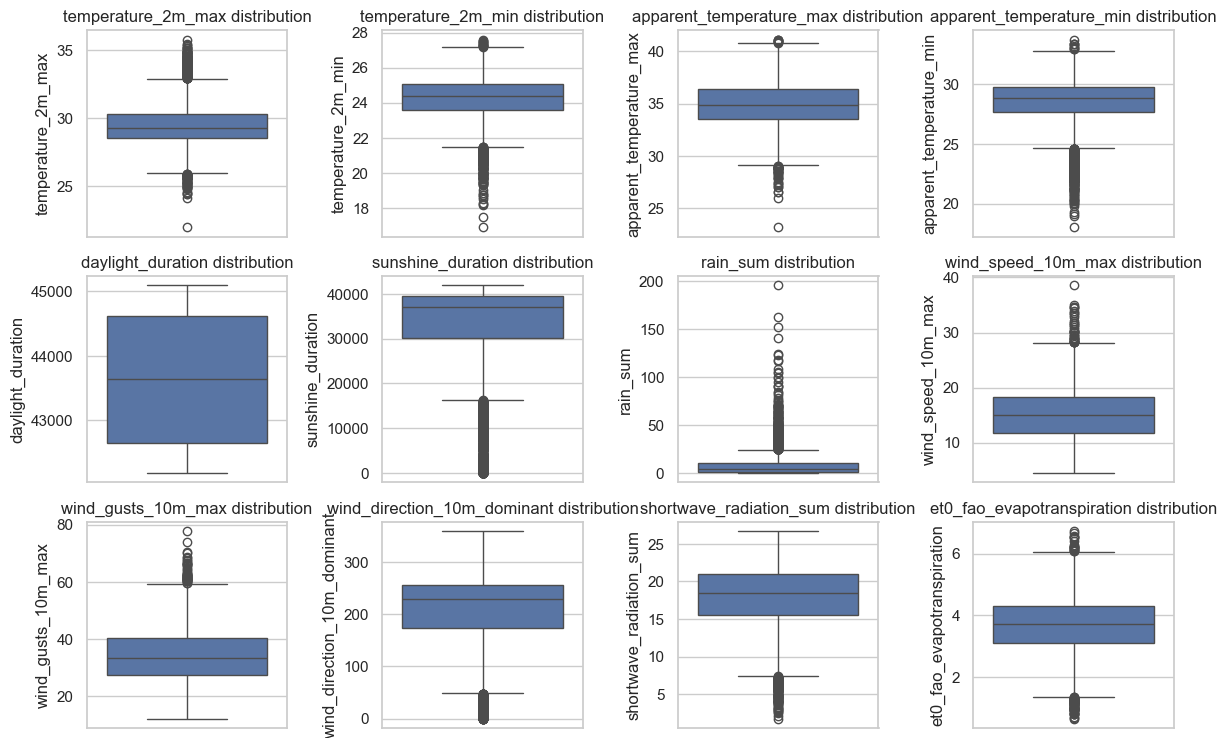

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 10))

for idx, i in enumerate(cols):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(data[i])
    plt.title(f"{i} distribution")
plt.tight_layout()
plt.show()

In [1]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(data, explorative=True)
# profile.to_notebook_iframe()

### Data Processing

In [26]:
encoder = LabelEncoder()
for col in ["rain_category"]:
    data[col] = encoder.fit_transform(data[col])

In [27]:
data.rain_category.value_counts()

rain_category
0    5731
2    2420
1    1012
Name: count, dtype: int64

In [28]:
scaler = StandardScaler()
num_cols = ['temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','daylight_duration','sunshine_duration','rain_sum','wind_speed_10m_max','wind_gusts_10m_max','wind_direction_10m_dominant','shortwave_radiation_sum','et0_fao_evapotranspiration']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [29]:
data.head()

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,rain_category
date,,,,,,,,,,,,,
2000-01-01 18:30:00+00:00,-1.989939,-1.275241,-2.993887,-2.023067,-1.413385,-0.977237,0.105914,0.877403,0.398968,-2.042279,-1.809875,-1.345792,2
2000-01-02 18:30:00+00:00,-1.215028,-1.492059,-1.157411,-1.661496,-1.407492,-1.031585,1.912314,-0.451605,-1.085346,-2.050908,-1.879105,-1.775487,0
2000-01-03 18:30:00+00:00,-0.642269,-1.492059,-0.750698,-1.604095,-1.401083,-1.360581,-0.063436,-0.512368,-0.714268,-2.006211,-1.164550,-1.050524,0
2000-01-04 18:30:00+00:00,-0.069509,-1.015060,0.135668,-1.320962,-1.394166,-0.438485,-0.345686,-0.535913,-0.920422,-1.878762,-0.462356,-0.528975,0
2000-01-05 18:30:00+00:00,-0.911802,-1.231877,-0.668395,-0.812783,-1.386758,-1.859567,-0.091661,-1.420779,-1.951196,-1.788858,-1.743117,-1.613438,2


In [30]:
data = data.reset_index(drop=True)
data.head()

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,rain_category
0,-1.989939,-1.275241,-2.993887,-2.023067,-1.413385,-0.977237,0.105914,0.877403,0.398968,-2.042279,-1.809875,-1.345792,2
1,-1.215028,-1.492059,-1.157411,-1.661496,-1.407492,-1.031585,1.912314,-0.451605,-1.085346,-2.050908,-1.879105,-1.775487,0
2,-0.642269,-1.492059,-0.750698,-1.604095,-1.401083,-1.360581,-0.063436,-0.512368,-0.714268,-2.006211,-1.164550,-1.050524,0
3,-0.069509,-1.015060,0.135668,-1.320962,-1.394166,-0.438485,-0.345686,-0.535913,-0.920422,-1.878762,-0.462356,-0.528975,0
4,-0.911802,-1.231877,-0.668395,-0.812783,-1.386758,-1.859567,-0.091661,-1.420779,-1.951196,-1.788858,-1.743117,-1.613438,2


In [31]:
X = data.drop(columns = ["rain_category"])
y = data["rain_category"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Target data balancing

In [33]:
# Define undersampling strategy to match the smallest class size
smallest_class_size = y_train.value_counts().min()  # Get the smallest class size
undersample = RandomUnderSampler(sampling_strategy={0: smallest_class_size, 1: smallest_class_size, 2: smallest_class_size}, random_state=42)

# Apply downsampling
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution before resampling:\n", y_train.value_counts())
print("Class distribution after resampling:\n", pd.Series(y_train_resampled).value_counts())

Class distribution before resampling:
 rain_category
0    4584
2    1936
1     810
Name: count, dtype: int64
Class distribution after resampling:
 rain_category
0    810
1    810
2    810
Name: count, dtype: int64


C:\Users\Administrator\.conda\envs\py3_9\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Administrator\.conda\envs\py3_9\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


### ML model Development

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [110]:
# Logistic Regression
print('Running LogisticRegression\n')
logreg = LogisticRegression(max_iter = 600)
scores = cross_val_score(logreg,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
logreg_mse = round(abs(scores.mean()), 4)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred = logreg.predict(X_test)
logreg_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
logreg_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
logreg_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
logreg_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)


# Decision Tree
print('Running DecisionTreeClassifier\n')
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
decision_tree_mse = round(abs(scores.mean()), 4)
decision_tree.fit(X_train_resampled,y_train_resampled)
y_pred = decision_tree.predict(X_test)
decision_tree_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
decision_tree_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
decision_tree_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
decision_tree_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# Random Forest
print('Running RandomForestClassifier\n')
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
random_forest_mse = round(abs(scores.mean()), 4)
random_forest.fit(X_train_resampled,y_train_resampled)
y_pred = random_forest.predict(X_test)
random_forest_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
random_forest_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
random_forest_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
random_forest_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# XGBoost
print('Running XGBClassifier\n')
xgb = XGBClassifier()
scores = cross_val_score(xgb,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
xgb_mse = round(abs(scores.mean()), 4)
xgb.fit(X_train_resampled,y_train_resampled)
y_pred = xgb.predict(X_test)
xgb_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
xgb_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
xgb_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
xgb_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# GB
print('Running GradientBoostingClassifier\n')
gb = GradientBoostingClassifier()
scores = cross_val_score(gb,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
gb_mse = round(abs(scores.mean()), 4)
gb.fit(X_train_resampled,y_train_resampled)
y_pred = gb.predict(X_test)
gb_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
gb_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
gb_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
gb_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# LightGBM
print('Running LGBMClassifier\n')
lgbm = LGBMClassifier()
scores = cross_val_score(lgbm,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
lgbm_mse = round(abs(scores.mean()), 4)
lgbm.fit(X_train_resampled,y_train_resampled)
y_pred = lgbm.predict(X_test)
lgbm_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
lgbm_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
lgbm_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
lgbm_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# Catboost
print('Running CatBoostClassifier\n')
catb = CatBoostClassifier(verbose = 0)
scores = cross_val_score(catb,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
catb_mse = round(abs(scores.mean()), 4)
catb.fit(X_train_resampled,y_train_resampled)
y_pred = catb.predict(X_test)
catb_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
catb_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
catb_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
catb_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# SVC
print('Running SVCClassifier\n')
svc = SVC()
scores = cross_val_score(svc,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
svc_mse = round(abs(scores.mean()), 4)
svc.fit(X_train_resampled,y_train_resampled)
y_pred = svc.predict(X_test)
svc_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
svc_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
svc_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
svc_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

# Histogram-based Gradient Boosting
print('Running HistGradientBoostingClassifier\n')
hgb = HistGradientBoostingClassifier()
scores = cross_val_score(hgb,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
hgb_mse = round(abs(scores.mean()), 4)
hgb.fit(X_train_resampled,y_train_resampled)
y_pred = hgb.predict(X_test)
hgb_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
hgb_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
hgb_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
hgb_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

model_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GB', 'LightGBM', 'catboost', 'SVC', 'HistBoost'],
    'Train MSE': [logreg_mse, decision_tree_mse, random_forest_mse, xgb_mse, gb_mse, lgbm_mse, catb_mse, svc_mse, hgb_mse],
    'Accuracy': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gb_acc, lgbm_acc, catb_acc, svc_acc, hgb_acc],
    'Precision': [logreg_prec, decision_tree_prec, random_forest_prec, xgb_prec, gb_prec, lgbm_prec, catb_prec, svc_prec, hgb_prec],
    'Recall': [logreg_rec, decision_tree_rec, random_forest_rec, xgb_rec, gb_rec, lgbm_rec, catb_rec, svc_rec, hgb_rec],
    'F1_Score': [logreg_f1, decision_tree_f1, random_forest_f1, xgb_f1, gb_f1, lgbm_f1, catb_f1, svc_f1, hgb_f1]
    
})

print(model_df[['Model', 'Train MSE', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].reset_index(drop = True))

Running LogisticRegression

Running DecisionTreeClassifier

Running RandomForestClassifier

Running XGBClassifier

Running GradientBoostingClassifier

Running LGBMClassifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2861
[LightGBM] [Info] Number of data points in the train set: 1944, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2855
[LightGBM] [Info] Number of data points in the train set: 1944, number of used features: 12
[LightGBM] [Info] Start

### Hyper Parameter Tuning

In [37]:
svc = SVC()

# Hyperparameter Grid
param_grid = {
    'C': [100, 110, 120],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Perform Grid Search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [38]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.58      0.67      1147
           1       0.39      0.86      0.54       202
           2       0.54      0.63      0.58       484

    accuracy                           0.62      1833
   macro avg       0.58      0.69      0.60      1833
weighted avg       0.69      0.62      0.63      1833



In [39]:
xgb = XGBClassifier()

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [0.1, 1, 10, 100, 200],  
    'learning_rate': [0.1, 0.2, 0.25, 0.3], 
    'max_depth': [8,10,12,14],
    'subsample': [0.8, 0.85, 0.9, 0.95]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\Administrator\.conda\envs\py3_9\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\.conda\envs\py3_9\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\.conda\envs\py3_9\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\Administrator\.conda\envs\py3_9\lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
  File "C

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 10, 'subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.52      0.64      1147
           1       0.40      0.86      0.55       202
           2       0.50      0.68      0.57       484

    accuracy                           0.60      1833
   macro avg       0.57      0.69      0.59      1833
weighted avg       0.68      0.60      0.61      1833



In [40]:
catb = CatBoostClassifier(verbose = 0)

# Define Hyperparameter Grid
param_grid = {
    'iterations':[250,275,300,325],
    'learning_rate':[0.02,0.03,0.04,0.05],
    'depth':[4,5,6]
}

# Perform Grid Search
grid_search = GridSearchCV(catb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_catb = grid_search.best_estimator_
y_pred = best_catb.predict(X_test)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'depth': 5, 'iterations': 250, 'learning_rate': 0.03}

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.51      0.63      1147
           1       0.42      0.84      0.56       202
           2       0.50      0.75      0.60       484

    accuracy                           0.61      1833
   macro avg       0.58      0.70      0.60      1833
weighted avg       0.70      0.61      0.62      1833



In [37]:
rfc = RandomForestClassifier()

# Define Hyperparameter Grid
param_grid = {
    'n_estimators':[125,150,160],
    'max_depth':[8,9,10,12,14],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4,5]
}

# Perform Grid Search
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.50      0.63      1147
           1       0.42      0.85      0.56       202
           2       0.49      0.75      0.60       484

    accuracy                           0.61      1833
   macro avg       0.58      0.70      0.60      1833
weighted avg       0.70      0.61      0.61      1833



In [35]:
# Catboost
print('Running CatBoostClassifier\n')
catb = CatBoostClassifier(depth= 5, iterations= 300, learning_rate= 0.03, verbose = 0)
scores = cross_val_score(catb,X_train_resampled,y_train_resampled,scoring='neg_mean_squared_error',cv=5)
catb_mse = round(abs(scores.mean()), 4)
catb.fit(X_train_resampled,y_train_resampled)
y_pred = catb.predict(X_test)
catb_acc = round(metrics.accuracy_score(y_test, y_pred), 4)
catb_prec = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)
catb_rec = round(metrics.recall_score(y_test, y_pred, average='macro'), 4)
catb_f1 = round(metrics.f1_score(y_test, y_pred, average='macro'), 4)

Running CatBoostClassifier



In [36]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy Score : {catb_acc}")
print(f"Precision Score: {catb_prec}")
print(f"Recall Score : {catb_rec}")
print(f"F1 Score : {catb_f1}")


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.51      0.63      1147
           1       0.42      0.86      0.57       202
           2       0.50      0.75      0.60       484

    accuracy                           0.61      1833
   macro avg       0.59      0.71      0.60      1833
weighted avg       0.70      0.61      0.62      1833

Accuracy Score : 0.6105
Precision Score: 0.5866
Recall Score : 0.7053
F1 Score : 0.5995


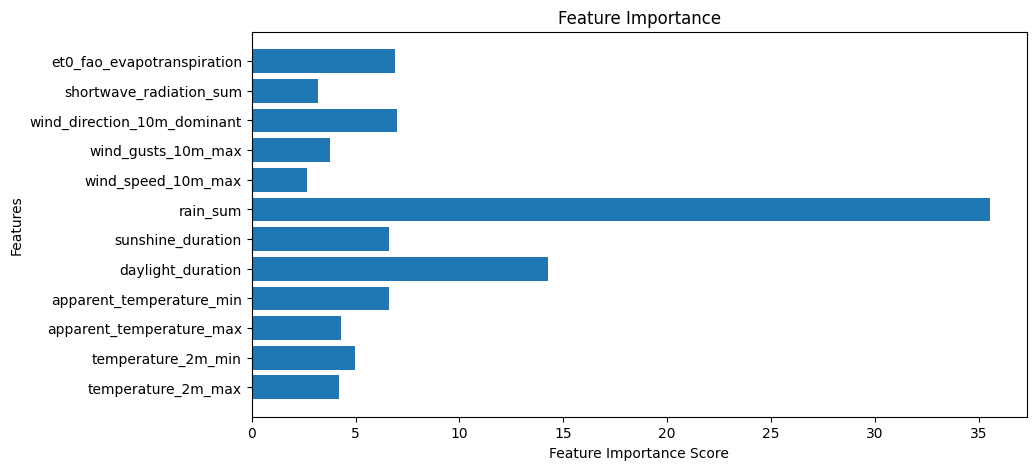

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance (for XGBoost, LightGBM, or CatBoost)
feature_importance = catb.feature_importances_
features = X_train_resampled.columns

# Plot
plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()